# Evaluate trained Mask RCNN Model

In [1]:
# imports
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

/Users/imkeschwenke/Programmieren/InstanceSegmentation/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
from mrcnn import model as modellib
from cElegans import CElegansConfig

class InferenceConfig(CElegansConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

MODEL_DIR = os.path.join("./", "logs")

# Recreate the model in inference mode
model3 = modellib.MaskRCNN(mode="inference",
                          config=inference_config,
                          model_dir=MODEL_DIR)
# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = "./mask_rcnn_custom_step3.h5"

# Load trained weights
print("Loading weights from ", model_path)
model3.load_weights(model_path, by_name=True)

Loading weights from  ./mask_rcnn_custom_step3.h5


In [4]:
# Recreate the model in inference mode
model4 = modellib.MaskRCNN(mode="inference",
                          config=inference_config,
                          model_dir=MODEL_DIR)
# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = "./mask_rcnn_custom_step4.h5"

# Load trained weights
print("Loading weights from ", model_path)
model4.load_weights(model_path, by_name=True)

Loading weights from  ./mask_rcnn_custom_step4.h5


In [5]:
# Recreate the model in inference mode
model5 = modellib.MaskRCNN(mode="inference",
                          config=inference_config,
                          model_dir=MODEL_DIR)
# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = "./mask_rcnn_custom_step5.h5"

# Load trained weights
print("Loading weights from ", model_path)
model5.load_weights(model_path, by_name=True)

Loading weights from  ./mask_rcnn_custom_step5.h5


In [7]:
# Load Validation Data
from cElegans import CElegansDataset

# Load validation dataset
dataset_val = CElegansDataset()
dataset_val.load_c_elegans("./dataset", "val")
dataset_val.prepare()

print("Images: {}\nClasses: {}".format(len(dataset_val.image_ids), dataset_val.class_names))

Images: 215
Classes: ['BG', 'c_elegans']


In [100]:
from cElegans import CElegansConfig

config = CElegansConfig()

class InferenceConfig(config.__class__):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.2

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.2
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  151.00000  uint8
image_meta               shape: (14,)                 min:    1.00000  max: 1024.00000  int64
gt_class_id              shape: (22,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (22, 4)               min:   25.00000  max:  971.00000  int32
gt_mask                  shape: (1024, 1024, 22)      min:    0.00000  max:    1.00000  bool


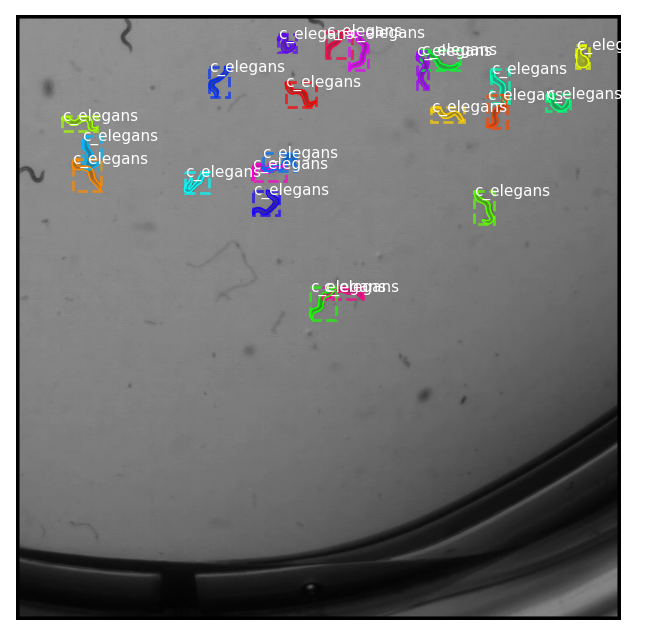

In [117]:
from mrcnn import visualize
from mrcnn import utils
from mrcnn.model import log
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, config,
                           image_id)
mask = utils.expand_mask(gt_bbox, gt_mask, original_image.shape)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", mask)

visualize.display_instances(original_image, gt_bbox, mask, gt_class_id,
                            dataset_val.class_names, figsize=(8, 8))

In [102]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  151.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   47.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
gt_class_id              shape: (22,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (22, 4)               min:   25.00000  max:  971.00000  int32
gt_mask                  shape: (1024, 1024, 22)      min:    0.00000  max:    1.00000  bool
predicted class_ids      shape: (1,)                  min:    1.00000  max:    1.00000  int32
predicted bbox           shape: (1, 4)                min:  277.00000  max:  306.00000  int32
predicted mask           shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool
mAP:  0.0


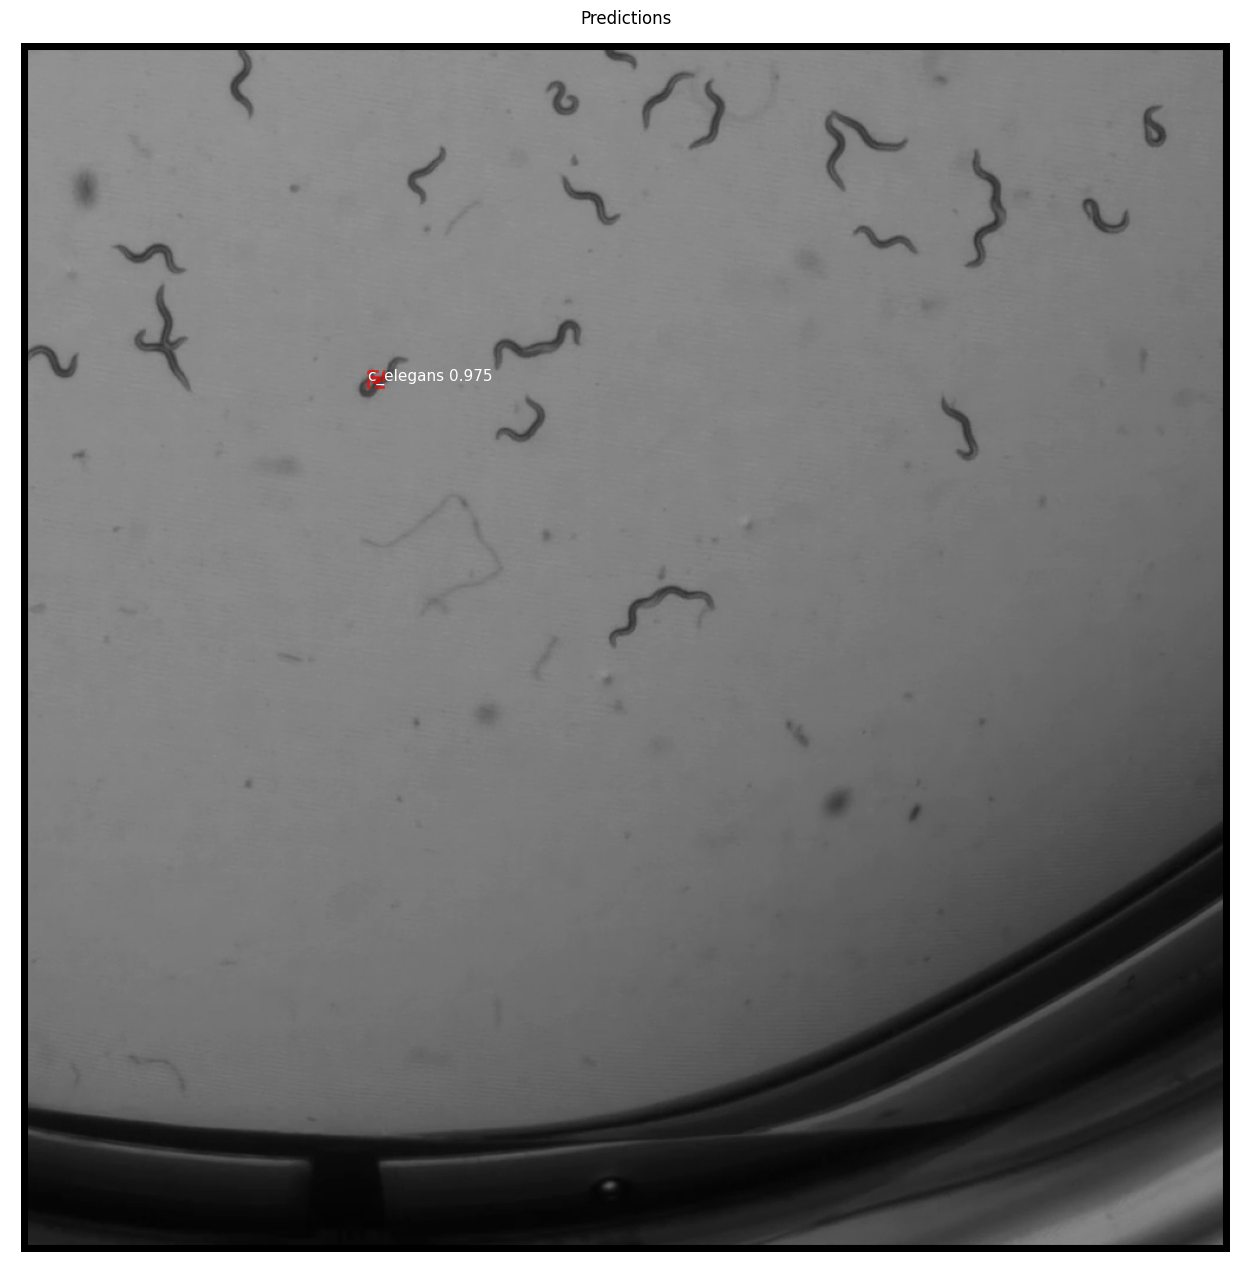

In [118]:
# Run object detection
results = model3.detect([original_image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", mask)
log("predicted class_ids", r['class_ids'])
log("predicted bbox", r['rois'])
log("predicted mask", r['masks'])

# MAP
image_ids = np.random.choice(dataset_val.image_ids, 50)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id)
    mask = utils.expand_mask(gt_bbox, gt_mask, original_image.shape)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model3.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'], iou_threshold=0.3)
    APs.append(AP)

print("mAP: ", np.mean(APs))

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  151.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   47.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
gt_class_id              shape: (11,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (11, 4)               min:  191.00000  max:  985.00000  int32
gt_mask                  shape: (1024, 1024, 11)      min:    0.00000  max:    1.00000  bool
predicted class_ids      shape: (67,)                 min:    1.00000  max:    1.00000  int32
predicted bbox           shape: (67, 4)               min:    9.00000  max: 1024.00000  int32
predicted mask           shape: (1024, 1024, 67)      min:    0.00000  max:    1.00000  bool
mAP:  0.0


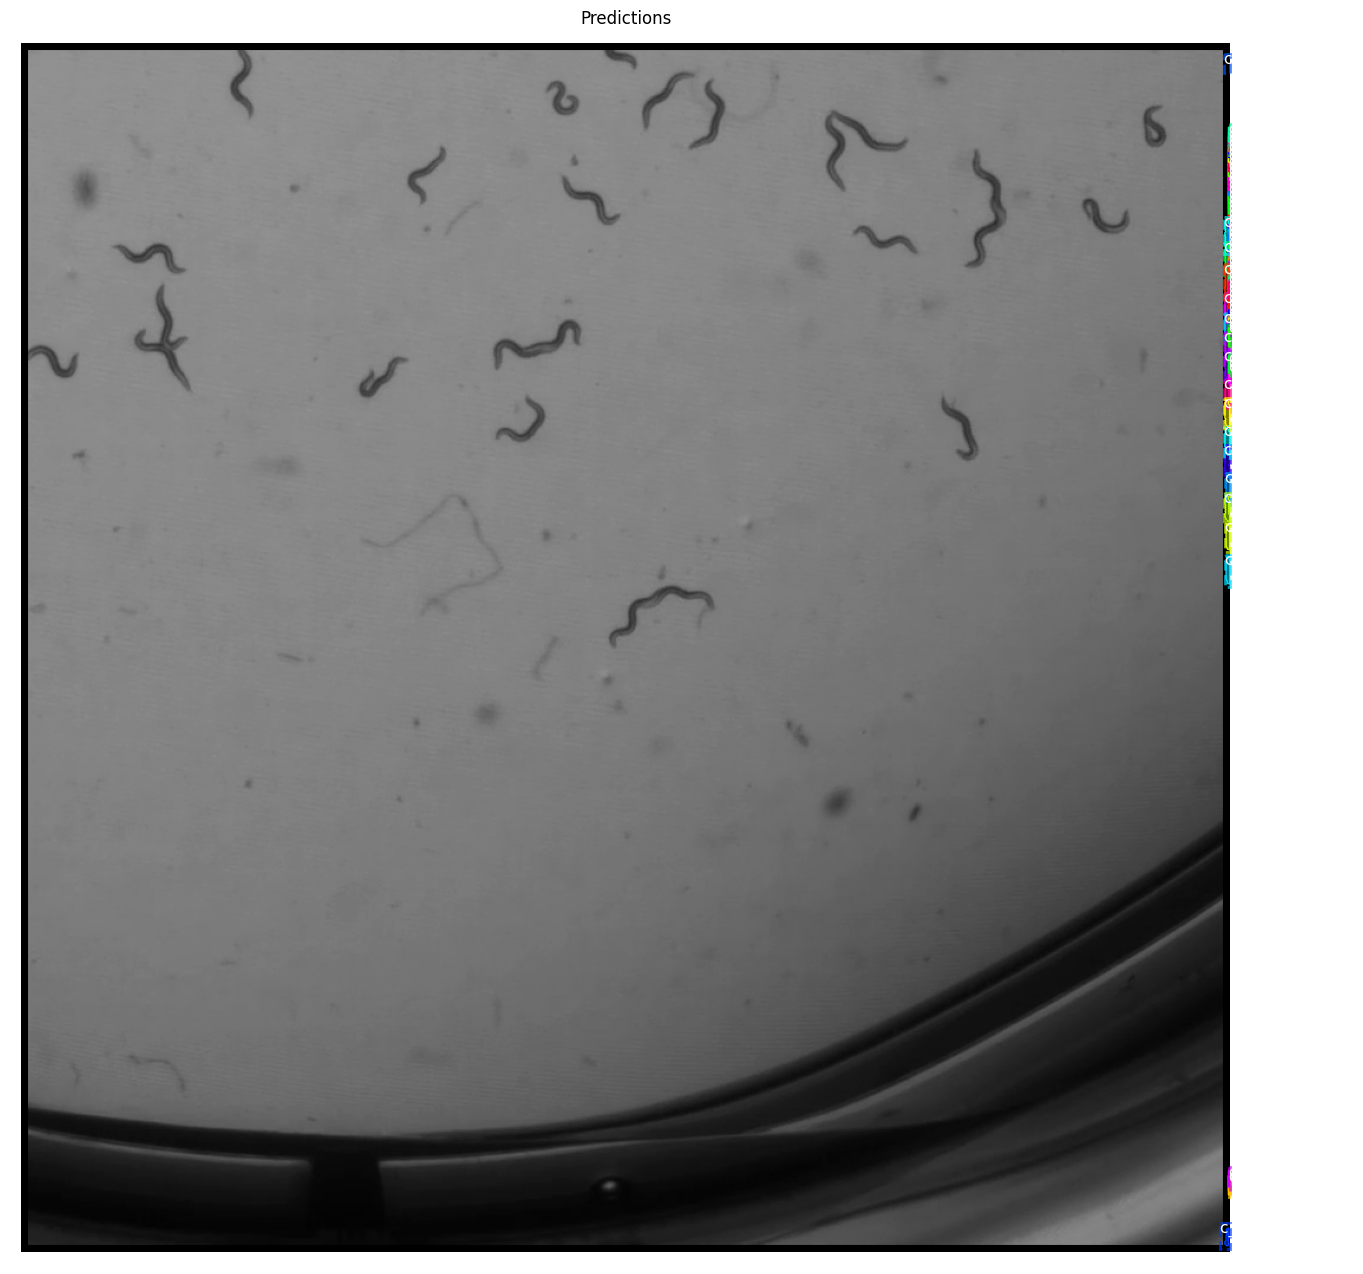

In [119]:
# Run object detection
results = model4.detect([original_image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", mask)
log("predicted class_ids", r['class_ids'])
log("predicted bbox", r['rois'])
log("predicted mask", r['masks'])

# MAP
image_ids = np.random.choice(dataset_val.image_ids, 50)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id)
    mask = utils.expand_mask(gt_bbox, gt_mask, original_image.shape)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model3.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)

print("mAP: ", np.mean(APs))

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  151.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   47.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
gt_class_id              shape: (2,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (2, 4)                min:  306.00000  max:  917.00000  int32
gt_mask                  shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  bool
predicted class_ids      shape: (3,)                  min:    1.00000  max:    1.00000  int32
predicted bbox           shape: (3, 4)                min:  108.00000  max:  937.00000  int32
predicted mask           shape: (1024, 1024, 3)       min:    0.00000  max:    1.00000  bool
mAP:  0.0


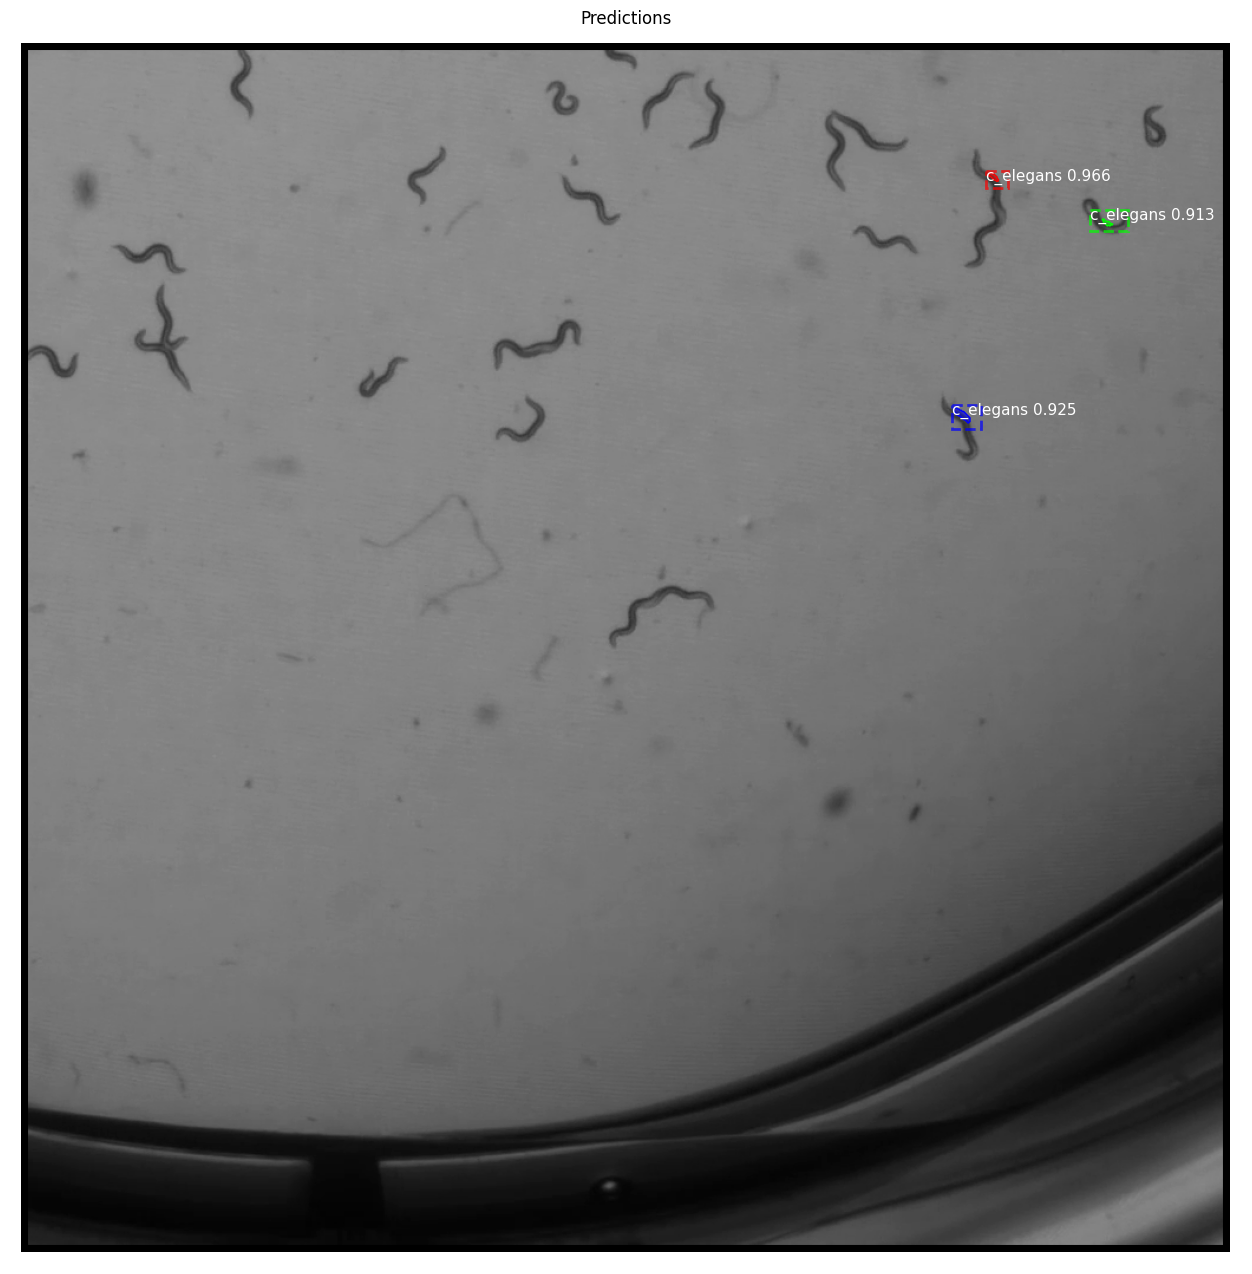

In [121]:
# Run object detection
results = model5.detect([original_image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", mask)
log("predicted class_ids", r['class_ids'])
log("predicted bbox", r['rois'])
log("predicted mask", r['masks'])

# MAP
image_ids = np.random.choice(dataset_val.image_ids, 50)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id)
    mask = utils.expand_mask(gt_bbox, gt_mask, original_image.shape)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model3.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)

print("mAP: ", np.mean(APs))